In [ ]:
## This is final check file to make sure math is working correctly and is similar to originally tested models from team in python
#from ShelterData_ML_Final.ipynb

In [13]:
### Update  code here to test different csvs, we're using our test data set
import shutil; shutil.copyfile('final_pipeline_prediction_sample_Test.csv', 'final_pipeline_prediction.csv')
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score, roc_auc_score, roc_curve, classification_report)
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
import matplotlib.pyplot as plt



/tmp/ipykernel_2487/3026058561.py:5: DtypeWarning: Columns (2,3,6,7,9,10,11,12,13,15,19,20,21,23,26,28,31,32,33,35,39,43,56) have mixed types. Specify dtype option on import or set low_memory=False.
  df_truth = pd.read_csv('df_cat_dog_harmonized.csv') # This is ground truth file


Confusion Matrix:
[[5105 1106]
 [ 387 1962]]

Classification Report:
              precision    recall  f1-score   support

 Not Adopted       0.93      0.82      0.87      6211
     Adopted       0.64      0.84      0.72      2349

    accuracy                           0.83      8560
   macro avg       0.78      0.83      0.80      8560
weighted avg       0.85      0.83      0.83      8560

Accuracy: 0.8256
Precision: 0.6395
Recall: 0.8352
F1 Score: 0.7244
AUC: 0.8856


/tmp/ipykernel_2487/3026058561.py:6: DtypeWarning: Columns (27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df_pred = pd.read_csv('final_pipeline_prediction.csv')


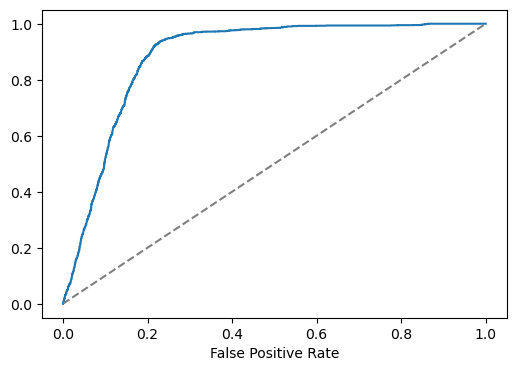

In [16]:
#Checking Adoption Prediciton first


#load
df_truth = pd.read_csv('df_cat_dog_harmonized.csv') # This is ground truth file
df_pred = pd.read_csv('final_pipeline_prediction.csv')

#Merge
df = pd.merge(df_truth[['primary_key','outcome_type_harmonized', 'outcome_type_harmonized_grouped', 'stay_length_days']], 
              df_pred[['primary_key','predicted_label', 'predicted_proba','stay_length_predicted', 'non_adopted_label']], 
              on='primary_key')

#Binarize ground truth: adopted = 1, else 0

df['actual_adopt'] = df['outcome_type_harmonized_grouped'].apply(lambda x: 1 if str(x).strip().lower() == 'adopted' else 0)

# Metrics

print("Confusion Matrix:")
print(confusion_matrix(df['actual_adopt'], df['predicted_label']))

print("\nClassification Report:")
print(classification_report(df['actual_adopt'], df['predicted_label'], labels=[0, 1], target_names=["Not Adopted", "Adopted"]))


print(f"Accuracy: {accuracy_score(df['actual_adopt'], df['predicted_label']):.4f}")
print(f"Precision: {precision_score(df['actual_adopt'], df['predicted_label']):.4f}")
print(f"Recall: {recall_score(df['actual_adopt'], df['predicted_label']):.4f}")
print(f"F1 Score: {f1_score(df['actual_adopt'], df['predicted_label']):.4f}")


# AUC

if 'predicted_proba' in df.columns:
    auc = roc_auc_score(df['actual_adopt'], df['predicted_proba'])
    print(f"AUC: {auc:.4f}")

#Plot ROC Curve
    fpr, tpr, _ = roc_curve(df['actual_adopt'], df['predicted_proba'])
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel("False Positive Rate")


In [18]:
df.head()

,primary_key,outcome_type_harmonized,outcome_type_harmonized_grouped,stay_length_days,predicted_label,predicted_proba,stay_length_predicted,non_adopted_label,actual_adopt
0,56266_45782,return to owner,non-adopted,2.0,0,0.458737,12.047632,2,0
1,56266_45790,return to owner,non-adopted,1.0,0,0.332031,12.047632,2,0
2,56266_45811,return to owner,non-adopted,1.0,0,0.332031,12.047632,2,0
3,59638_45811,return to owner,non-adopted,6.0,1,0.822267,11.255080,1,0
4,61750_45796,foster,non-adopted,1.0,1,0.797752,10.809351,2,0


In [19]:
#Weighted Accuracy is good and AUC is good, so we keep model as is.

In [20]:
#Checking predicted stay lenght but only for adopted 

#  only include rows where predicted_proba >= 0.5
df_filtered = df[df['predicted_proba'] >= 0.5].copy()

# Drop rows with missing values in either column
df_filtered = df_filtered.dropna(subset=['stay_length_days', 'stay_length_predicted'])

# Evaluate metrics
r2 = r2_score(df_filtered['stay_length_days'], df_filtered['stay_length_predicted'])
mse = mean_squared_error(df_filtered['stay_length_days'], df_filtered['stay_length_predicted'])
mae = mean_absolute_error(df_filtered['stay_length_days'], df_filtered['stay_length_predicted'])

print(f"Filtered Rows: {len(df_filtered)}")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")


Filtered Rows: 2966
R² Score: -0.0021
Mean Absolute Error (MAE): 10.59
Mean Squared Error (MSE): 315.72


In [21]:
#R2 is pretty similar to what we expected, we ended up dropping this.
#Now we evlauate 

In [22]:
# Clean and map ground truth to integer labels
label_map = {
    "foster": 0,
    "foster to adopt": 0,
    "rtf": 0,
    "rescue": 1,
    "return to rescue": 1,
    "return to owner": 2
}
df['outcome_type_harmonized'] = df['outcome_type_harmonized'].str.lower().str.strip()
df['actual_label'] = df['outcome_type_harmonized'].map(label_map)
df['predicted_label'] = df['non_adopted_label'].astype(int)

In [24]:
df

,primary_key,outcome_type_harmonized,outcome_type_harmonized_grouped,stay_length_days,predicted_label,predicted_proba,stay_length_predicted,non_adopted_label,actual_adopt,actual_label
0,56266_45782,return to owner,non-adopted,2.0,2,0.458737,12.047632,2,0,2.0
1,56266_45790,return to owner,non-adopted,1.0,2,0.332031,12.047632,2,0,2.0
2,56266_45811,return to owner,non-adopted,1.0,2,0.332031,12.047632,2,0,2.0
3,59638_45811,return to owner,non-adopted,6.0,1,0.822267,11.255080,1,0,2.0
4,61750_45796,foster,non-adopted,1.0,2,0.797752,10.809351,2,0,0.0
...,...,...,...,...,...,...,...,...,...,...
8555,A742553_45818,euthanasia,non-adopted,1.0,1,0.023434,8.470929,1,0,NaN
8556,A742577_45819,return to owner,non-adopted,1.0,2,0.027024,10.090792,2,0,2.0
8557,A742748_45821,euthanasia,non-adopted,0.0,2,0.034818,29.155756,2,0,NaN
8558,A742807_45821,return to owner,non-adopted,1.0,2,0.050712,47.477127,2,0,2.0


In [25]:
#Lastly, we'll predict multiclass outcome


# Drop rows with unknown classes 
df = df.dropna(subset=['actual_label'])

# Keep only rows where predicted adoption confidence is low
df = df[df['predicted_proba'] < 0.5]


# Evaluation
print("Unique ground truth labels:")
print(df['outcome_type_harmonized'].unique())

print("\nValue counts after mapping:")
print(df['actual_label'].value_counts(dropna=False))


print("\nConfusion Matrix:")
print(confusion_matrix(df['actual_label'], df['predicted_label']))

print("\nClassification Report:")
print(classification_report(df['actual_label'], df['predicted_label'],
                            target_names=['foster', 'rescue', 'return_to_owner']))




Unique ground truth labels:
['return to owner' 'foster' 'rtf' 'rescue']

Value counts after mapping:
actual_label
0.0    1658
2.0     622
1.0     622
Name: count, dtype: int64

Confusion Matrix:
[[792 835  31]
 [ 10 580  32]
 [ 47  39 536]]

Classification Report:
                 precision    recall  f1-score   support

         foster       0.93      0.48      0.63      1658
         rescue       0.40      0.93      0.56       622
return_to_owner       0.89      0.86      0.88       622

       accuracy                           0.66      2902
      macro avg       0.74      0.76      0.69      2902
   weighted avg       0.81      0.66      0.67      2902

